In [1]:
import sys
sys.path.insert(0,'../libs')
import fourier as foo
from matplotlib import pyplot as plt
import numpy as np
from scipy import fftpack
from scipy import misc
# import seaborn as sns
# sns.despine()
from numpy import linalg

## Ejercicio 1

**freq_filter** toma como parámetros la imágen a filtrar, y una función de decisión. La misma, en pos de la *distancia* de una cierta amplitud para una frecuencia f al centro del espacio, decide si será removida o no.

In [54]:
def freq_filter(img, CUTOFF_FUN):
    filtered_img = np.copy(img)
    m = len(img); n = len(img[0])
    distance = lambda i,j: np.sqrt(abs(i-m/2)**2 + abs(j-n/2)**2)
    for i in range(m):
        for j in range(n):
            if not CUTOFF_FUN(distance(i,j)):
                filtered_img[i][j] = 0
    return filtered_img

**Nota:** Si en algun momento se reodernana los cuadrantes de la imagen en el dominio de las frecuencias, antes de ser convertido por la IFFT, los mismos deben tener el mismo orden; ya sea el original, o con el el (0,0) de las frecuencias centrado en la imagen. En el *code-block* de abajo se puede ver ejemplos de ciertos filtros. En cada uno, **l** y **h** hacen referencia a los valores de corte inferior y superior.

In [52]:
BAND_PASS_FILTER = lambda l,h: lambda d: (d <= l) or (d> h)
LOW_PASS_FILTER = lambda l: lambda d: (d <= l)
HIGH_PASS_FILTER = lambda h: lambda d: (d > h)

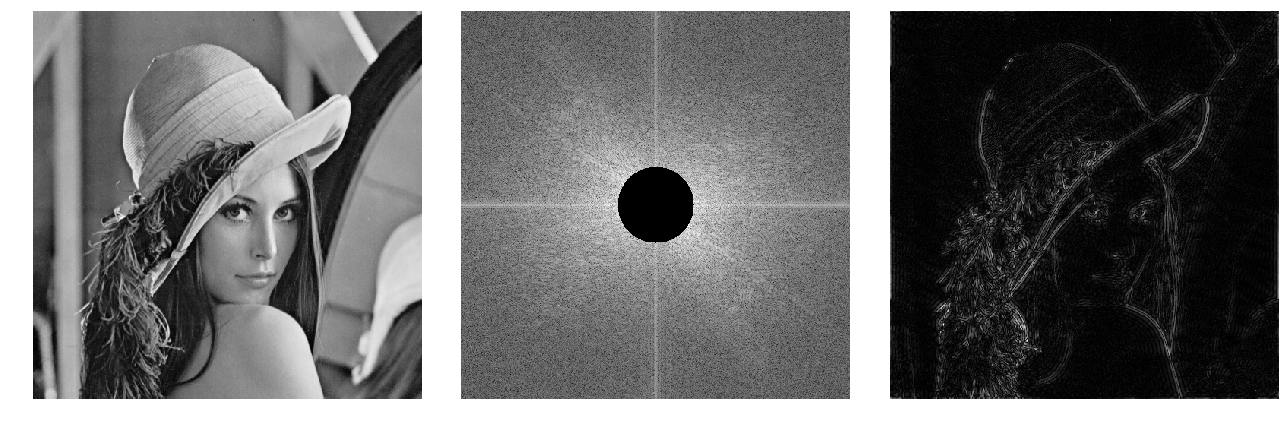

In [58]:
img = misc.imread('lena.png')
img_F = fftpack.fft2(img)
plt.figure(figsize=(18,10))
plt.subplot(1,3,1); plt.axis('off')
plt.imshow(img, cmap='gray')
plt.subplot(1,3,2); plt.axis('off')
# Aca ya reordeno los valores en complejo de toda la imagen (parte real e imaginaria),
# de forma de operar directamente con ellos, sin preocuparme.
img_F = foo.fix_norm_plot_regions(img_F)
img_ABS = np.abs(img_F)

# funcion de corte
CUTOFF_FUNC = HIGH_PASS_FILTER(50)
img_ABS = freq_filter(img_ABS, CUTOFF_FUNC)
plt.imshow(foo.log_transform(img_ABS), cmap='gray')
plt.subplot(1,3,3); plt.axis('off')
img_MOD = foo.assemble_complex(img_ABS, \
                               np.angle(img_F))
img_deMOD = fftpack.ifft2(img_MOD)
plt.imshow(np.abs(img_deMOD), cmap='gray')
plt.tight_layout()
plt.show()

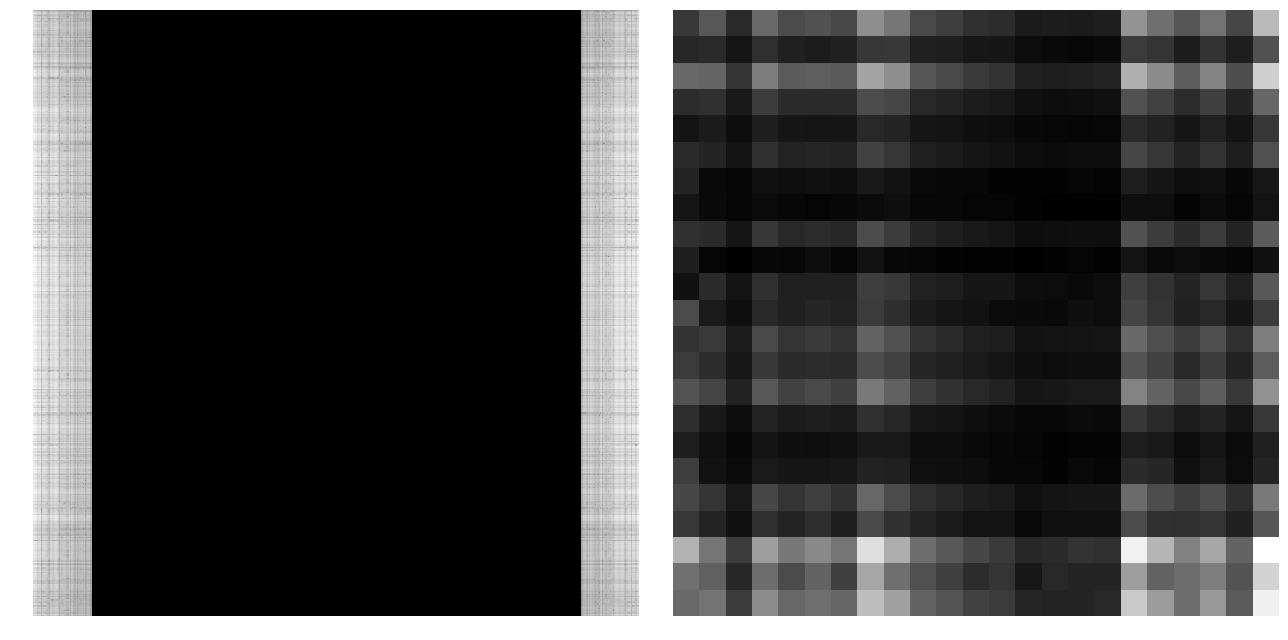

In [61]:
plt.figure(figsize=(18,10)); plt.subplot(1,2,1); plt.axis('off')
KERN_F = foo.fix_norm_plot_regions(np.dot(linalg.inv(img_F),img_MOD))
plt.imshow(foo.log_transform(np.abs(KERN_F)),cmap='gray')
plt.subplot(1,2,2); plt.axis('off')
KERN = np.abs(fftpack.ifft2(KERN_F[0:23,0:23]))
plt.imshow(KERN, cmap='gray')
plt.tight_layout(); plt.show()

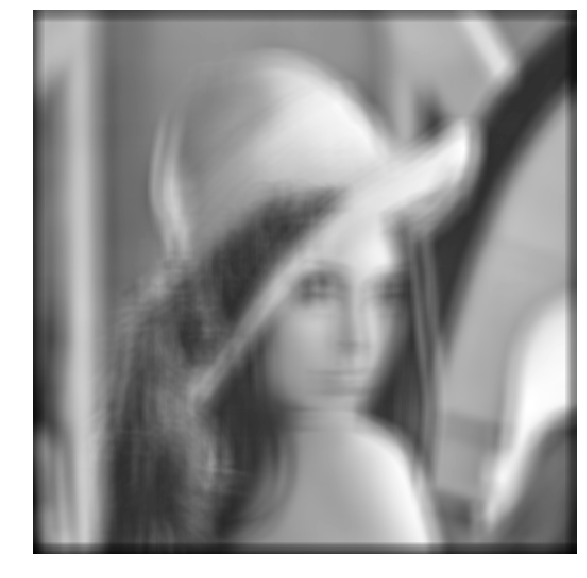

In [62]:
# reduced_KERN = KERN[0:5,0:5]
reduced_KERN = KERN
reduced_KERN = reduced_KERN/np.amax(reduced_KERN)
# print(reduced_KERN.shape)
plt.figure(figsize=(18,10)); plt.axis('off')
plt.imshow(foo.convolve(img, reduced_KERN) ,cmap='gray')
plt.show()

## Ejercicio 5

Notar que no se lidió con los borden en la implementación del filtro. La decisión fue tomada debido que al hacerlo, se debería usar una estimación de los datos que faltan a considerar ahí, o reducir la dimensión de la ventana que se toma en cuenta en los casos borde. De hacerlo, si dicha ventana tuviera alta concentración de *outliers*, se deterioraría la calidad final.

In [71]:
def median_filter(I, dim):
    m = len(I); n = len(I[0])
    out = np.zeros((m,n))
    for i in range(0+dim/2, m-dim/2):
        for j in range(0+dim/2, n-dim/2):
            t = I[i-dim/2:i+dim/2+1, j-dim/2:j+dim/2+1]
            out[i,j] = np.median(t)
    return out

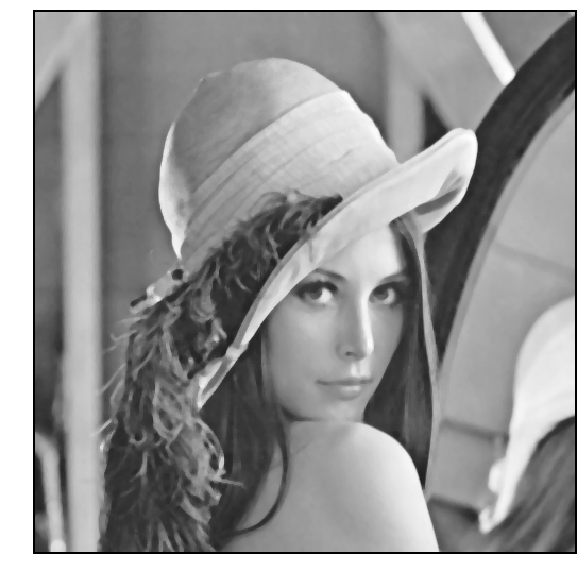

In [77]:
plt.figure(figsize=(18,10)); plt.axis('off')
plt.imshow(median_filter(img, 5), cmap='gray')
plt.show()